In [1]:
import mido
mid = mido.MidiFile('IMSLP221460-WIMA.2591-BWV_1079_1-Part.mid', clip=True)
#mid.tracks
print(mid.tracks)

[MidiTrack([
  MetaMessage('set_tempo', tempo=500000, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=0, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('end_of_track', time=0)]), MidiTrack([
  MetaMessage('track_name', name='Violine', time=0),
  MetaMessage('device_name', name='MIDI: Out To MIDI Yoke:  1', time=0),
  Message('program_change', channel=0, program=40, time=0),
  Message('aftertouch', channel=0, value=97, time=0),
  Message('control_change', channel=0, control=7, value=97, time=0),
  Message('pitchwheel', channel=0, pitch=0, time=0),
  Message('control_change', channel=0, control=11, value=63, time=0),
  Message('note_on', channel=0, note=72, velocity=127, time=0),
  Message('note_off', channel=0, note=72, velocity=64, time=730),
  Message('note_on', channel=0, note=75, velocity=127, time=38),
  Message('note_off', channel=0, note=75, velocity=64, time=730),
  Message('note_on', channel=0, note=79, velocity=127, time=38),
  Mess

In [2]:
import numpy as np
notes = np.zeros(372)
print(notes)
bpm = 0
print(type(mid.tracks[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
tempi = []
for track in mid.tracks:
    for msg in track:
        if msg.type == 'set_tempo':
            tempi.append(msg.tempo)
print(tempi)

[500000]


In [4]:
tempo = tempi[0]
ticks_per_beat = mid.ticks_per_beat
bpm = 60000000/tempo
dt = 60 / (bpm * ticks_per_beat)
print(dt)
print(ticks_per_beat)

0.0013020833333333333
384


[  0.          72.           2.          75.           4.
  79.           6.          80.           8.          71.
  11.          79.          12.          78.          14.
  77.          16.          76.          18.          75.
  21.          74.          22.          73.          23.
  72.          24.          71.          25.          69.
  25.5         67.          26.          72.          27.
  77.          28.          75.          30.          74.
  30.25        75.          30.375       74.          30.5
  75.          30.625       74.          30.75        75.
  30.875       74.          31.          75.          31.125
  74.          31.25        75.          31.375       74.
  31.5         75.          31.625       74.          31.75
  75.          31.875       74.          32.          72.
  33.          84.          34.          78.          35.
  81.          36.          70.          37.          86.
  38.          79.          39.          82.          40.
  75.   

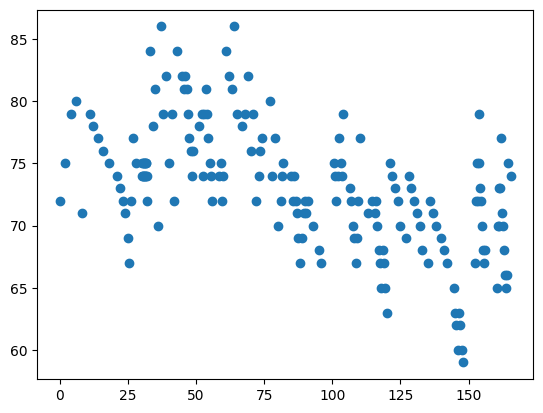

In [5]:
note = 0
beats = []
tones = []
for track in mid.tracks:
    beat = 0
    for msg in track:
        beat += msg.time / ticks_per_beat
        if((msg.type == 'note_on') and (note<371)):
            notes[note] = beat
            beats.append(beat)
            notes[note+1] = msg.note
            tones.append(msg.note)
            
            note += 2
print(notes)
import matplotlib.pyplot as plt
plt.scatter(beats, tones)
plt.show()

80


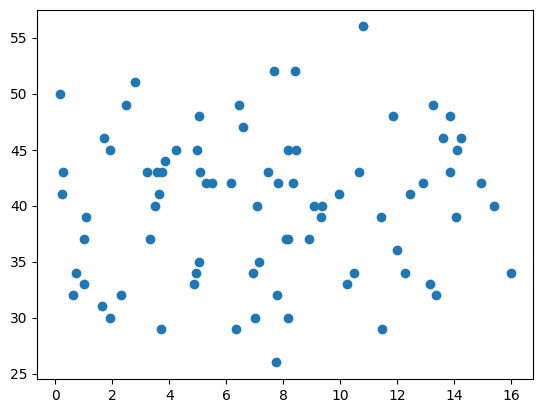

In [6]:
# ::::::::::::::: Random MIDI-Generator::::::::::::::
import random

tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
rseq = np.zeros(shape=(256,1))
duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
# maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten

rmoments = []
rtones = []
for rnote in range(0, n_notes):
    rmoments.append(random.uniform(0, duration))
    rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
rmoments.sort()

print(len(rtones))
plt.scatter(rmoments, rtones)
plt.show()

In [7]:
rmid = mido.MidiFile()
track = mido.MidiTrack()
rmid.tracks.append(track)
tpb = 1680
rmid.ticks_per_beat = tpb

rest = 0
rnote = 0
for rnote in range(0, n_notes-1):
    if((rmoments[rnote+1]-rmoments[rnote])*tpb <= 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=int(round((rmoments[rnote+1]-rmoments[rnote])*tpb))))
        rest = 0

    elif((rmoments[rnote+1]-rmoments[rnote])*tpb > 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=840))
        rest = int(round((rmoments[rnote+1]-rmoments[rnote])*tpb-840))
        
track.append(mido.Message('note_on', channel=0, note=rtones[n_notes-1], velocity=127, time=rest))
track.append(mido.Message('note_off', channel=0, note=rtones[n_notes-1], velocity=96, time=840))    

track.append(mido.MetaMessage('end_of_track'))

rmid.save('random.mid')

In [8]:
def mid2vec(mid):
    # Bepaal tijdseenheden
    tempi = []
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempi.append(msg.tempo)
    tempo = 500000
    if(len(tempi)>0):
        tempo = tempi[0]
    ticks_per_beat = mid.ticks_per_beat
    bpm = 60000000/tempo
    dt = 60 / (bpm * ticks_per_beat)

    # Maak vector met de noten
    notes = np.zeros(372)
    note = 0
    beats = []
    tones = []
    for track in mid.tracks:
        beat = 0
        for msg in track:
            beat += msg.time / ticks_per_beat
            if((msg.type == 'note_on') and (note<371)):
                notes[note] = beat
                beats.append(beat)
                notes[note+1] = msg.note
                tones.append(msg.note)
                note += 2

    return(notes)
print(mid2vec(mid))

[  0.          72.           2.          75.           4.
  79.           6.          80.           8.          71.
  11.          79.          12.          78.          14.
  77.          16.          76.          18.          75.
  21.          74.          22.          73.          23.
  72.          24.          71.          25.          69.
  25.5         67.          26.          72.          27.
  77.          28.          75.          30.          74.
  30.25        75.          30.375       74.          30.5
  75.          30.625       74.          30.75        75.
  30.875       74.          31.          75.          31.125
  74.          31.25        75.          31.375       74.
  31.5         75.          31.625       74.          31.75
  75.          31.875       74.          32.          72.
  33.          84.          34.          78.          35.
  81.          36.          70.          37.          86.
  38.          79.          39.          82.          40.
  75.   

In [9]:
def randombass():
    tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
    rseq = np.zeros(shape=(256,1))
    duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
    n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
    # maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten
    
    rmoments = []
    rtones = []
    for rnote in range(0, n_notes):
        rmoments.append(random.uniform(0, duration))
        rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
    rmoments.sort()

    rnote = 0
    rnotes = np.zeros(372)
    halfpos = 0
    while(rnote < 371 and halfpos < n_notes):
        rnotes[rnote] = rmoments[halfpos]
        rnotes[rnote+1] = rtones[halfpos]
        halfpos += 1
        rnote += 2
    return(rnotes)

In [10]:
print(randombass())

[ 1.05207138 51.          2.52078221 53.          3.34516795 39.
  4.58968813 41.          4.835707   45.          5.23398955 46.
  5.84505533 47.          7.17538155 47.          7.27787275 41.
  7.33352341 42.          8.32195279 41.          8.81297577 41.
  9.35893687 39.          9.9011341  41.         10.86023908 35.
 11.1621647  40.         11.23204802 54.         11.59471476 51.
 11.97329057 53.         11.99100365 34.         12.55525724 43.
 12.76418839 49.         13.42794005 43.         13.79226798 41.
 14.06188594 52.         14.08456112 45.         14.50253153 35.
 15.20555776 38.         16.94301573 33.         17.30337866 48.
 18.41612206 53.         19.00757304 38.         19.34062626 53.
 20.14598388 32.         21.34532843 47.         21.59441188 46.
 22.06833056 46.         22.82362339 46.         22.83264218 50.
 22.891456   39.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

In [11]:
# Import dataset
import os
directory = 'BASSmidis'

filepaths = []
for filename in os.scandir(directory):
    if filename.is_file():
        filepaths.append(filename.path)
print(filepaths)

['BASSmidis\\005 - deadmau5 bass.mid', 'BASSmidis\\006 - hardwell bass.mid', 'BASSmidis\\01 c minor bass.mid', 'BASSmidis\\01 c sharp bass.mid', 'BASSmidis\\01 dms ttl1 bass.mid', 'BASSmidis\\016 - paul van dyk bass.mid', 'BASSmidis\\017 - nicky romero bass.mid', 'BASSmidis\\019 bass.mid', 'BASSmidis\\01a sub bass.mid', 'BASSmidis\\02 c major bass.mid', 'BASSmidis\\02 dms ttl1 bass.mid', 'BASSmidis\\02 f bass.mid', 'BASSmidis\\02 g bass.mid', 'BASSmidis\\024 - dada life bass.mid', 'BASSmidis\\026 - fedde le grand bass.mid', 'BASSmidis\\029 - laidback luke bass.mid', 'BASSmidis\\02b flux bass.mid', 'BASSmidis\\02b nuke em bass.mid', 'BASSmidis\\02c flux bass.mid', 'BASSmidis\\02c nuke em bass.mid', 'BASSmidis\\03 d minor bass.mid', 'BASSmidis\\03 dms ttl1 bass.mid', 'BASSmidis\\034 bass.mid', 'BASSmidis\\035 - chuckie bass.mid', 'BASSmidis\\036 - zatox bass.mid', 'BASSmidis\\037 bass.mid', 'BASSmidis\\039 - cosmic gate bass.mid', 'BASSmidis\\03b neuro funk bass.mid', 'BASSmidis\\03b sub

In [12]:
dataset = []
for path in filepaths:
    mid = mido.MidiFile(path, clip=True)
    dataset.append(mid2vec(mid))

In [13]:
def adderror(notes):
    noteserr = np.copy(notes)
    n_notes = int(round(np.count_nonzero(noteserr)/2))
    dice = random.randint(1, 10)
    if(dice < 7):
        errpos = random.randint(0, n_notes - 1) * 2
        noteserr[errpos] += np.random.normal(loc=0, scale=1)
    else:
        errpos = random.randint(1, n_notes) * 2 - 1
        noteserr[errpos] += round(np.random.normal(loc=0, scale=6))
    return(noteserr)

In [14]:
# Genereer basslines met error

errorN = []
errorN_2 = []
errorN_3 = []
errorN_4 = []
piece = 0
numpieces = len(dataset)
while(piece < numpieces):
    #print(filepaths[piece])
    numnotes = int(round(np.count_nonzero(dataset[piece])))
    e1 = dataset[piece]
    e2 = dataset[piece]
    e3 = dataset[piece]
    e4 = dataset[piece]
    for cycle in range(0, numnotes):
        e1 = adderror(e1)
        e2 = adderror(e2)
        e3 = adderror(e3)
        e4 = adderror(e4)
    errorN.append(e1)
    errorN_2.append(e2)
    errorN_3.append(e3)
    errorN_4.append(e4)
    piece += 1
piece = 0

In [15]:
def normalize(notes):
    note = 0
    while(note < 372):
        notes[note] *= 1/24 # gemiddeld aantal beats in een random-fragment
        notes[note+1] = (notes[note+1])/60 # Middle C = 1
        note += 2
    return(notes)

In [16]:
def denormalize(notes):
    note = 0
    while(note < 372):
        notes[note] *= 24 # gemiddeld aantal beats in een random-fragment
        notes[note+1] = int(round((notes[note+1])*60)) # Middle C = 60
        note += 2
    return(notes)

In [17]:
piece = 0
normalizeddata = np.copy(dataset)
normalizederrorN = np.copy(errorN)
normalizederrorN_2 = np.copy(errorN_2)
normalizederrorN_3 = np.copy(errorN_3)
normalizederrorN_4 = np.copy(errorN_4)
while(piece < numpieces):
    normalizeddata[piece] = normalize(normalizeddata[piece])
    normalizederrorN[piece] = normalize(normalizederrorN[piece])
    normalizederrorN_2[piece] = normalize(normalizederrorN_2[piece])
    normalizederrorN_3[piece] = normalize(normalizederrorN_3[piece])
    normalizederrorN_4[piece] = normalize(normalizederrorN_4[piece])
    piece += 1

In [18]:
y = np.concatenate((normalizeddata, normalizeddata, normalizeddata, normalizeddata))
X = np.concatenate((normalizederrorN, normalizederrorN_2, normalizederrorN_3, normalizederrorN_4))

## === NEURAAL NET 2, TRAINEN OP N_notes fouten, 1 net ===

In [19]:
import tensorflow as tf
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(372, activation='tanh', input_shape=(372,)))
model.add(layers.Dense(372, activation='tanh'))
model.add(layers.Dense(372, activation='tanh'))
model.add(layers.Dense(372, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 372)               138756    
                                                                 
 dense_1 (Dense)             (None, 372)               138756    
                                                                 
 dense_2 (Dense)             (None, 372)               138756    
                                                                 
 dense_3 (Dense)             (None, 372)               138756    
                                                                 
Total params: 555024 (2.12 MB)
Trainable params: 555024 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='LogCosh', optimizer=opt, metrics='accuracy')
model.fit(X, y, batch_size=2, epochs=2, validation_split=0.1)

Epoch 1/2
6466/6466 [==============================] - 109s 16ms/step - loss: 31.0321 - accuracy: 0.0833 - val_loss: 0.0373 - val_accuracy: 0.0946
Epoch 2/2
6466/6466 [==============================] - 104s 16ms/step - loss: 31.0294 - accuracy: 0.0807 - val_loss: 0.0352 - val_accuracy: 0.0967


In [42]:
#model.save('Model2mod1.keras')

In [51]:
model2 = keras.models.load_model('model1.keras')
noise = normalize(randombass())
n_notes = int(round(np.count_nonzero(noise)/2))
input = tf.expand_dims(noise, axis=0)
print(input)
cycle = 0
while(cycle < int(round(n_notes))):
    input = model.predict(input)
    cycle += 1
output = input
print(output)

tf.Tensor(
[[0.00242425 0.53333333 0.00797179 0.75       0.00824301 0.7
  0.01355609 0.58333333 0.02148055 0.4        0.02329223 0.5
  0.03877578 0.53333333 0.0632898  0.68333333 0.06733008 0.46666667
  0.06829409 0.58333333 0.07086212 0.55       0.07374196 0.66666667
  0.07735185 0.6        0.07996623 0.6        0.08719116 0.8
  0.09209262 0.6        0.0948218  0.51666667 0.10308284 0.56666667
  0.11593484 0.48333333 0.1180606  0.43333333 0.1187687  0.75
  0.1216553  0.56666667 0.12985838 0.5        0.13608867 0.7
  0.1431671  0.53333333 0.14710318 0.5        0.14762078 0.71666667
  0.15327191 0.5        0.15338067 0.73333333 0.15767699 0.4
  0.18220653 0.7        0.197022   0.68333333 0.20108828 0.65
  0.21333737 0.66666667 0.22284384 0.61666667 0.2295887  0.48333333
  0.23410126 0.48333333 0.23647101 0.43333333 0.23779913 0.68333333
  0.240309   0.63333333 0.24373855 0.58333333 0.24534138 0.58333333
  0.2540642  0.61666667 0.26158326 0.48333333 0.27024368 0.51666667
  0.27619966 0.4

In [52]:
print(output[0])
AInotes = denormalize(output[0])
print(output[0])
print(AInotes)

[0.         0.6841199  0.         0.72033525 0.03698483 0.74913645
 0.11570168 0.7248774  0.09491827 0.71343905 0.13763686 0.7335302
 0.18150742 0.70224583 0.18045168 0.6520691  0.14106733 0.6596307
 0.17666537 0.5982971  0.16020644 0.5565961  0.19994658 0.5348365
 0.15623549 0.4600154  0.         0.4174475  0.         0.37260908
 0.15789254 0.3338505  0.09341444 0.24842061 0.09250971 0.2550337
 0.04789343 0.22896142 0.0926299  0.22578935 0.06307575 0.15029536
 0.         0.08824532 0.01270884 0.1292329  0.         0.06091275
 0.         0.0428964  0.         0.0369776  0.00363892 0.
 0.         0.         0.         0.         0.         0.00840186
 0.         0.         0.         0.         0.         0.01856638
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04199708
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00853179 0.         0.
 0.         0.         0.      

In [49]:
def notes2mid(notes):
    mid = mido.MidiFile()
    track = mido.MidiTrack()
    mid.tracks.append(track)
    tpb = 1680
    mid.ticks_per_beat = tpb

    points = []
    index = 0
    while(index < 372):
        if((notes[index+1] > 15) and (notes[index+1] < 128)):
            points.append([notes[index], notes[index+1]])
        index = index + 2

    print(len(points))
    index = 0
    points = sorted(points)
    n_notes = len(points)
    moments = []
    tones = []
    while(index < n_notes):
        moments.append(points[index][0])
        tones.append(points[index][1])
        index += 1
    
    rest = 0
    note = 0
    for note in range(0, n_notes-1):
        if((moments[note+1]-moments[note])*tpb <= 840):
            track.append(mido.Message('note_on', channel=0, note=int(tones[note]), velocity=127, time=rest))
            track.append(mido.Message('note_off', channel=0, note=int(tones[note]), velocity=96, time=int(round((moments[note+1]-moments[note])*tpb))))
            rest = 0
    
        elif((moments[note+1]-moments[note])*tpb > 840):
            track.append(mido.Message('note_on', channel=0, note=int(tones[note]), velocity=127, time=rest))
            track.append(mido.Message('note_off', channel=0, note=int(tones[note]), velocity=96, time=840))
            rest = int(round((moments[note+1]-moments[note])*tpb-840))
            
    track.append(mido.Message('note_on', channel=0, note=int(tones[n_notes-1]), velocity=127, time=rest))
    track.append(mido.Message('note_off', channel=0, note=int(tones[n_notes-1]), velocity=96, time=840))    
    
    track.append(mido.MetaMessage('end_of_track'))
    
    mid.save('AI2.mid')
    plt.scatter(moments, tones)
    plt.show()
    return("Saved AI2.mid")

16


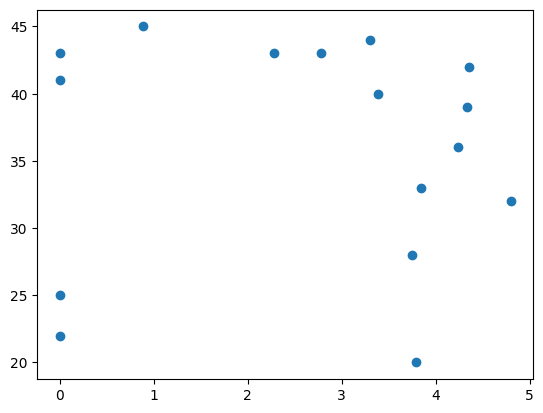

Saved AI2.mid


In [53]:
print(notes2mid(AInotes))